In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)

In [9]:
def plot_figure(data, title_name, unit, lev1, lev2):
    
    # Define the figure and each axis for the 4 rows and 3 columns
    fig, axs = plt.subplots(nrows=1,ncols=3,
                            subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},
                            figsize=(11,9))
    
    # Set Width / Height padding between subplots, expressed as a fraction of the subplot width
    fig.subplots_adjust(wspace=0.25, hspace=0.35) 
    
    # axs is a 2 dimensional array of `GeoAxes`
    # flatten it into a 1-D array
    axs=axs.flatten()
    
    # Loop and plot
    for i,m in enumerate(ts['time']):
        
        # Contour plot
        # Add coastines in Miocene Scenario
        if i==2:
            cs2=axs[i].contourf(lons,ds_Pi['lat'],data[i,:,:], levels = lev1,
                                transform = ccrs.PlateCarree(),
                                cmap='RdBu_r', extend='both')
            axs[i].contour(lons, ds_Pi['lat'], mask_Mio, [0.5,1.5],
                           transform = ccrs.PlateCarree(),
                       colors='k', linewidths=1.5, zorder=3)
            
        else:
            cs1=axs[i].contourf(lons,ds_Pi['lat'],data[i,:,:], levels = lev2,
                                transform = ccrs.PlateCarree(),
                                cmap='coolwarm', extend='both')
            axs[i].contour(lons, ds_Pi['lat'], mask_ctrl, [0.5,1.5],
                           transform = ccrs.PlateCarree(),
                           colors='darkgrey', linewidths=1.5, zorder=3)
            axs[i].contour(lons, ds_Pi['lat'], mask_Mio, [0.5,1.5],
                           transform = ccrs.PlateCarree(),
                           colors='k', linewidths=1.5, zorder=4)
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()  
        axs[i].xaxis.set_major_formatter(lon_formatter)  # set the format of xticks_label
        axs[i].tick_params(axis='y', size=2)             # set xtick parameters
        for xlabel in axs[i].get_xticklabels():          # set xticks_label
            xlabel.set_fontsize(9)        

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)  # set the format of yticks_label
        axs[i].tick_params(axis='y', size=2)             # set ytick parameters
        for ylabel in axs[i].get_yticklabels():          # set yticks_label
            ylabel.set_fontsize(9)        
        
        
        # Title each subplot with the name of the month
        axs[i].set_title(title[i])
          
        # Add gridlines
        axs[i].gridlines(colors='white', zorder=2)
        
    # Add colorbar
    cax1 = fig.add_axes([0.18, 0.37, 0.35, 0.015])    # set the [x0, y0, width, height] of the colorbar
    CB1  = plt.colorbar(cs1, cax=cax1, orientation='horizontal')
    cax2 = fig.add_axes([0.67, 0.37, 0.23, 0.015])    # set the [x0, y0, width, height] of the colorbar
    CB2  = plt.colorbar(cs2, cax=cax2, orientation='horizontal')
    
    # Add colobar's title
    plt.figtext(0.6,0.37,unit,ha='center',fontsize=15)
    # Add title
    plt.suptitle(title_name, y=0.63, fontsize=18)
    # fig.savefig('plot_TS.png')

In [5]:
# --- read data --- 

path_ctrl = '/scratch/pchen25/clim680_dataset/Preindustrial/'
path_file = '/scratch/pchen25/clim680_dataset/MidMiocene/'
file_ctrl = 'b.e12.B1850C5CN.f19_g16.iPI.02_ANN_concat.nc'
file_Pi = 'Mio_Pi/B.MMIOx2_C5_280_WISOon.cam.clim_1900_1999.nc'
file_Mio = 'Mio_Mio/B.MMIOx2_C5_280_WISOon_aeroZonal.cam.clim_100_300.nc'

ds_ctrl = xr.open_dataset(path_ctrl + file_ctrl)
ds_Pi = xr.open_dataset(path_file+file_Pi)
ds_Mio = xr.open_dataset(path_file+file_Mio)

ds_Mio['TS'][1212::]

<xarray.DataArray 'TS' (time: 1200, lat: 96, lon: 144)>
[16588800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0201-02-01 00:00:00 ... 0301-01-01 00:00:00
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

In [6]:
# --- input LANDFRAC ---

path_land_Mio = 'atm/B.MMIOx2_C5_280_WISOon_aeroZonal_ANN_concat.nc'
land_Mio = xr.open_dataset(path_file+path_land_Mio)


var = 'LANDFRAC'
mask_ctrl = ds_ctrl[var][0,:,:]
mask_Mio = land_Mio[var][0,:,:]

mask_ctrl, mask_ctrl_lons = add_cyclic_point(mask_ctrl, coord=ds_ctrl['lon'])
mask_Mio, mask_Mio_lons = add_cyclic_point(mask_Mio, coord=ds_Mio['lon'])

In [7]:
# --- input variables ---

var = 'TS'
ts_ctrl = ds_ctrl[var].mean(dim='time')
ts_Mio_Pi = ds_Pi[var].mean(dim='time')
ts_Mio_Mio = ds_Mio[var][1212::].mean(dim='time')

ts_Mio_Pi_Ano = ts_Mio_Pi - ts_ctrl
ts_Mio_Mio_Ano = ts_Mio_Mio - ts_ctrl
ts_Mio_Diff = ts_Mio_Mio - ts_Mio_Pi

ts = ds_ctrl[var][0:3,:,:].copy()
ts[0,:,:] = ts_Mio_Pi_Ano
ts[1,:,:] = ts_Mio_Mio_Ano
ts[2,:,:] = ts_Mio_Diff

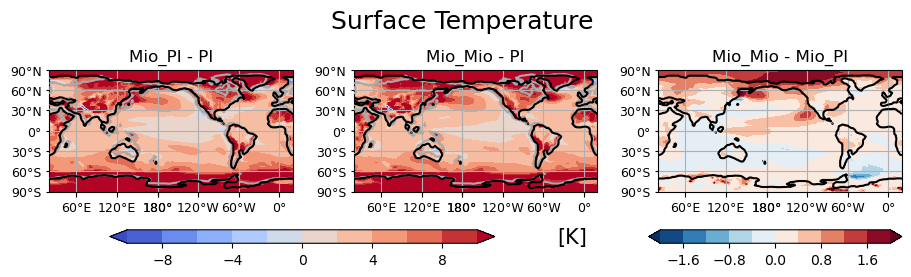

In [10]:
title = ['Mio_PI - PI', 'Mio_Mio - PI', 'Mio_Mio - Mio_PI']

# Add cyclic point to data
data = ts
data, lons = add_cyclic_point(data, coord=ds_Pi['lon'])

title_name = 'Surface Temperature'
unit = '[K]'
lev1 = np.linspace(-2, 2, 11)
lev2 = np.linspace(-10, 10, 11)
plot_figure(data, title_name, unit, lev1, lev2)

## (1) TOA Net Flux

In [11]:
# --- read data --- 

file_Pi = 'Mio_Pi/B.MMIOx2_C5_280_WISOon.cam.clim_var_1900_1999.nc'
file_Mio = 'Mio_Mio/B.MMIOx2_C5_280_WISOon_aeroZonal.cam.clim_var_100_300.nc'

ds_ctrl = xr.open_dataset(path_ctrl + file_ctrl)
ds_Pi = xr.open_dataset(path_file+file_Pi)
ds_Mio = xr.open_dataset(path_file+file_Mio)

In [12]:
# --- input variables: FLNT ---

var = 'FLNT'
toa_lw_ctrl = ds_ctrl[var].mean(dim='time')
toa_lw_Mio_Pi = ds_Pi[var].mean(dim='time')
toa_lw_Mio_Mio = ds_Mio[var][1212::].mean(dim='time')

toa_lw_Mio_Pi_Ano = toa_lw_Mio_Pi - toa_lw_ctrl
toa_lw_Mio_Mio_Ano = toa_lw_Mio_Mio - toa_lw_ctrl
toa_lw_Mio_Diff = toa_lw_Mio_Mio - toa_lw_Mio_Pi

toa_lw = ds_ctrl[var][0:3,:,:].copy()
toa_lw[0,:,:] = toa_lw_Mio_Pi_Ano
toa_lw[1,:,:] = toa_lw_Mio_Mio_Ano
toa_lw[2,:,:] = toa_lw_Mio_Diff

# --- input variables: FSNT ---

var = 'FSNT'
toa_sw_ctrl = ds_ctrl[var].mean(dim='time')
toa_sw_Mio_Pi = ds_Pi[var].mean(dim='time')
toa_sw_Mio_Mio = ds_Mio[var][1212::].mean(dim='time')

toa_sw_Mio_Pi_Ano = toa_sw_Mio_Pi - toa_sw_ctrl
toa_sw_Mio_Mio_Ano = toa_sw_Mio_Mio - toa_sw_ctrl
toa_sw_Mio_Diff = toa_sw_Mio_Mio - toa_sw_Mio_Pi

toa_sw = ds_ctrl[var][0:3,:,:].copy()
toa_sw[0,:,:] = toa_sw_Mio_Pi_Ano
toa_sw[1,:,:] = toa_sw_Mio_Mio_Ano
toa_sw[2,:,:] = toa_sw_Mio_Diff

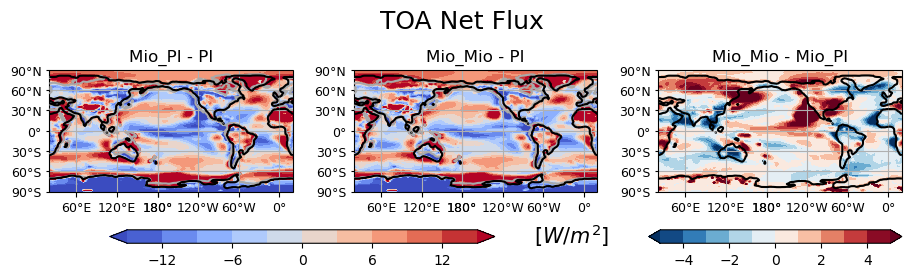

In [13]:
title = ['Mio_PI - PI', 'Mio_Mio - PI', 'Mio_Mio - Mio_PI']

# --- Net Flux at TOA: (FSNT - FLNT) influx to atmosphere ---
toa_net = toa_sw - toa_lw

# Add cyclic point to data
data = toa_net
data, lons = add_cyclic_point(data, coord=ds_Pi['lon'])

title_name = 'TOA Net Flux'
unit = '[$W/m^2$]'
lev1 = np.linspace(-5, 5, 11)
lev2 = np.linspace(-15, 15, 11)
plot_figure(data, title_name, unit, lev1, lev2)

## (2) Surface Net Flux

In [14]:
# --- read data --- 

file_Pi = 'Mio_Pi/B.MMIOx2_C5_280_WISOon.cam.clim_var_1900_1999.nc'
file_Mio = 'Mio_Mio/B.MMIOx2_C5_280_WISOon_aeroZonal.cam.clim_var_100_300.nc'

ds_ctrl = xr.open_dataset(path_ctrl + file_ctrl)
ds_Pi = xr.open_dataset(path_file+file_Pi)
ds_Mio = xr.open_dataset(path_file+file_Mio)

In [15]:
# --- input variables: FLNT ---

var = 'FLNS'
sfc_lw_ctrl = ds_ctrl[var].mean(dim='time')
sfc_lw_Mio_Pi = ds_Pi[var].mean(dim='time')
sfc_lw_Mio_Mio = ds_Mio[var][1212::].mean(dim='time')

sfc_lw_Mio_Pi_Ano = sfc_lw_Mio_Pi - sfc_lw_ctrl
sfc_lw_Mio_Mio_Ano = sfc_lw_Mio_Mio - sfc_lw_ctrl
sfc_lw_Mio_Diff = sfc_lw_Mio_Mio - sfc_lw_Mio_Pi

sfc_lw = ds_ctrl[var][0:3,:,:].copy()
sfc_lw[0,:,:] = sfc_lw_Mio_Pi_Ano
sfc_lw[1,:,:] = sfc_lw_Mio_Mio_Ano
sfc_lw[2,:,:] = sfc_lw_Mio_Diff

# --- input variables: FSNT ---

var = 'FSNS'
sfc_sw_ctrl = ds_ctrl[var].mean(dim='time')
sfc_sw_Mio_Pi = ds_Pi[var].mean(dim='time')
sfc_sw_Mio_Mio = ds_Mio[var][1212::].mean(dim='time')

sfc_sw_Mio_Pi_Ano = sfc_sw_Mio_Pi - sfc_sw_ctrl
sfc_sw_Mio_Mio_Ano = sfc_sw_Mio_Mio - sfc_sw_ctrl
sfc_sw_Mio_Diff = sfc_sw_Mio_Mio - sfc_sw_Mio_Pi

sfc_sw = ds_ctrl[var][0:3,:,:].copy()
sfc_sw[0,:,:] = sfc_sw_Mio_Pi_Ano
sfc_sw[1,:,:] = sfc_sw_Mio_Mio_Ano
sfc_sw[2,:,:] = sfc_sw_Mio_Diff

# --- input variables: LHFLX ---

var = 'LHFLX'
sfc_lh_ctrl = ds_ctrl[var].mean(dim='time')
sfc_lh_Mio_Pi = ds_Pi[var].mean(dim='time')
sfc_lh_Mio_Mio = ds_Mio[var][1212::].mean(dim='time')

sfc_lh_Mio_Pi_Ano = sfc_lh_Mio_Pi - sfc_lh_ctrl
sfc_lh_Mio_Mio_Ano = sfc_lh_Mio_Mio - sfc_lh_ctrl
sfc_lh_Mio_Diff = sfc_lh_Mio_Mio - sfc_lh_Mio_Pi

sfc_lh = ds_ctrl[var][0:3,:,:].copy()
sfc_lh[0,:,:] = sfc_lh_Mio_Pi_Ano
sfc_lh[1,:,:] = sfc_lh_Mio_Mio_Ano
sfc_lh[2,:,:] = sfc_lh_Mio_Diff

# --- input variables: SHFLX ---

var = 'SHFLX'
sfc_sh_ctrl = ds_ctrl[var].mean(dim='time')
sfc_sh_Mio_Pi = ds_Pi[var].mean(dim='time')
sfc_sh_Mio_Mio = ds_Mio[var][1212::].mean(dim='time')

sfc_sh_Mio_Pi_Ano = sfc_sh_Mio_Pi - sfc_sh_ctrl
sfc_sh_Mio_Mio_Ano = sfc_sh_Mio_Mio - sfc_sh_ctrl
sfc_sh_Mio_Diff = sfc_sh_Mio_Mio - sfc_sh_Mio_Pi

sfc_sh = ds_ctrl[var][0:3,:,:].copy()
sfc_sh[0,:,:] = sfc_sh_Mio_Pi_Ano
sfc_sh[1,:,:] = sfc_sh_Mio_Mio_Ano
sfc_sh[2,:,:] = sfc_sh_Mio_Diff

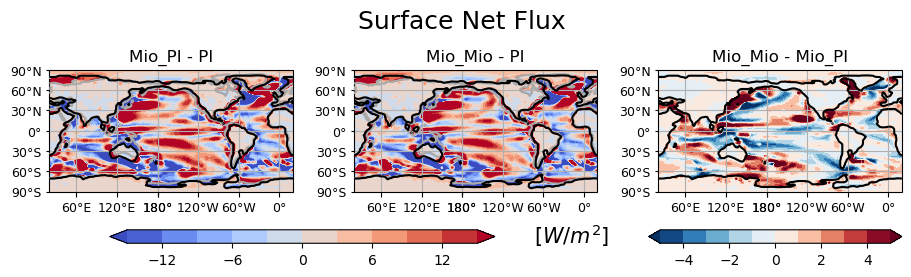

In [17]:
title = ['Mio_PI - PI', 'Mio_Mio - PI', 'Mio_Mio - Mio_PI']

# --- Net Flux at Surface: (FSNS - FLNS - LHFLX - SHFLX) influx to the ocean ---
sfc_net = sfc_sw - sfc_lw - sfc_lh - sfc_sh

# Add cyclic point to data
data = sfc_net
data, lons = add_cyclic_point(data, coord=ds_Pi['lon'])

title_name = 'Surface Net Flux'
unit = '[$W/m^2$]'
lev1 = np.linspace(-5, 5, 11)
lev2 = np.linspace(-15, 15, 11)
plot_figure(data, title_name, unit, lev1, lev2)

## (3) Cloud Fraction: Total, High, Low

In [18]:
# --- read data --- 

file_Pi = 'Mio_Pi/B.MMIOx2_C5_280_WISOon.cam.clim_var_1900_1999.nc'
file_Mio = 'Mio_Mio/B.MMIOx2_C5_280_WISOon_aeroZonal.cam.clim_var_100_300.nc'

ds_ctrl = xr.open_dataset(path_ctrl + file_ctrl)
ds_Pi = xr.open_dataset(path_file+file_Pi)
ds_Mio = xr.open_dataset(path_file+file_Mio)

In [19]:
# --- input variables: Total Cloud Fraction ---

var = 'CLDTOT'
total_cld_ctrl = ds_ctrl[var].mean(dim='time')
total_cld_Mio_Pi = ds_Pi[var].mean(dim='time')
total_cld_Mio_Mio = ds_Mio[var][1212::].mean(dim='time')

total_cld_Mio_Pi_Ano = total_cld_Mio_Pi - total_cld_ctrl
total_cld_Mio_Mio_Ano = total_cld_Mio_Mio - total_cld_ctrl
total_cld_Mio_Diff = total_cld_Mio_Mio - total_cld_Mio_Pi

total_cld = ds_ctrl[var][0:3,:,:].copy()
total_cld[0,:,:] = total_cld_Mio_Pi_Ano
total_cld[1,:,:] = total_cld_Mio_Mio_Ano
total_cld[2,:,:] = total_cld_Mio_Diff

# --- input variables: High Cloud Fraction ---

var = 'CLDHGH'
high_cld_ctrl = ds_ctrl[var].mean(dim='time')
high_cld_Mio_Pi = ds_Pi[var].mean(dim='time')
high_cld_Mio_Mio = ds_Mio[var][1212::].mean(dim='time')

high_cld_Mio_Pi_Ano = high_cld_Mio_Pi - high_cld_ctrl
high_cld_Mio_Mio_Ano = high_cld_Mio_Mio - high_cld_ctrl
high_cld_Mio_Diff = high_cld_Mio_Mio - high_cld_Mio_Pi

high_cld = ds_ctrl[var][0:3,:,:].copy()
high_cld[0,:,:] = high_cld_Mio_Pi_Ano
high_cld[1,:,:] = high_cld_Mio_Mio_Ano
high_cld[2,:,:] = high_cld_Mio_Diff

# --- input variables: Low Cloud Fraction ---

var = 'CLDLOW'
low_cld_ctrl = ds_ctrl[var].mean(dim='time')
low_cld_Mio_Pi = ds_Pi[var].mean(dim='time')
low_cld_Mio_Mio = ds_Mio[var][1212::].mean(dim='time')

low_cld_Mio_Pi_Ano = low_cld_Mio_Pi - low_cld_ctrl
low_cld_Mio_Mio_Ano = low_cld_Mio_Mio - low_cld_ctrl
low_cld_Mio_Diff = low_cld_Mio_Mio - low_cld_Mio_Pi

low_cld = ds_ctrl[var][0:3,:,:].copy()
low_cld[0,:,:] = low_cld_Mio_Pi_Ano
low_cld[1,:,:] = low_cld_Mio_Mio_Ano
low_cld[2,:,:] = low_cld_Mio_Diff

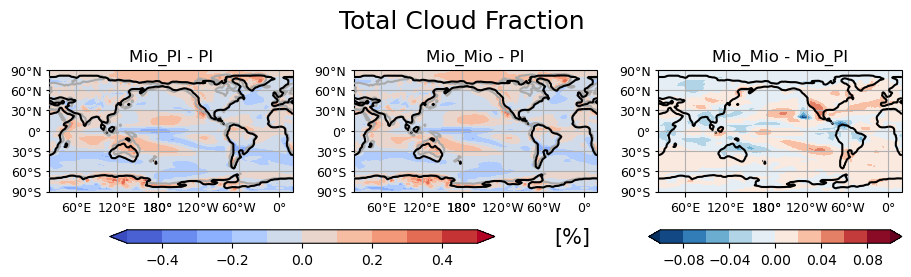

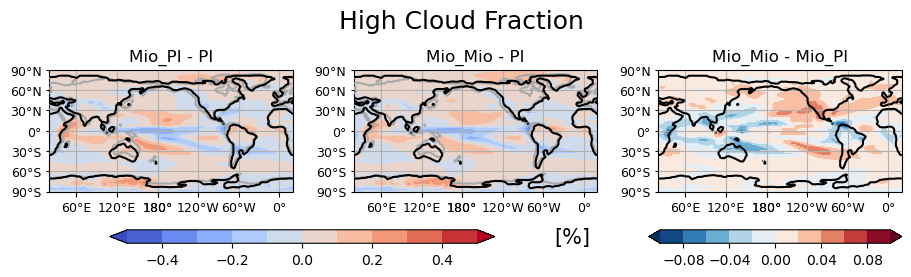

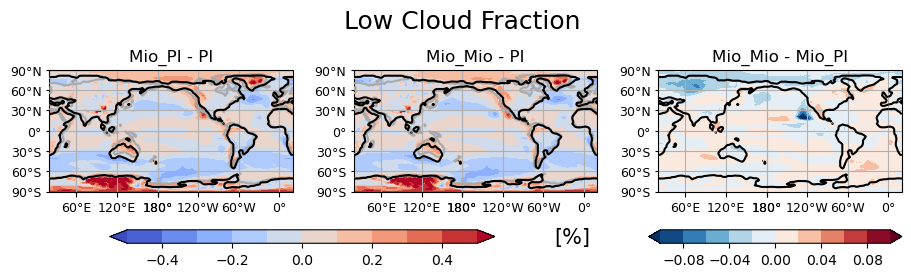

In [21]:
title = ['Mio_PI - PI', 'Mio_Mio - PI', 'Mio_Mio - Mio_PI']

# --- plot: Total Cloud ---
data = total_cld
data, lons = add_cyclic_point(data, coord=ds_Pi['lon'])

title_name = 'Total Cloud Fraction'
unit = '[%]'
lev1 = np.linspace(-0.1, 0.1, 11)
lev2 = np.linspace(-0.5, 0.5, 11)
plot_figure(data, title_name, unit, lev1, lev2)

# --- plot: High Cloud ---
data = high_cld
data, lons = add_cyclic_point(data, coord=ds_Pi['lon'])

title_name = 'High Cloud Fraction'
unit = '[%]'
lev1 = np.linspace(-0.1, 0.1, 11)
lev2 = np.linspace(-0.5, 0.5, 11)
plot_figure(data, title_name, unit, lev1, lev2)

# --- plot: Low Cloud ---
data = low_cld
data, lons = add_cyclic_point(data, coord=ds_Pi['lon'])

title_name = 'Low Cloud Fraction'
unit = '[%]'
lev1 = np.linspace(-0.1, 0.1, 11)
lev2 = np.linspace(-0.5, 0.5, 11)
plot_figure(data, title_name, unit, lev1, lev2)